## 集成学习

通过集成多个算法的决策进行选择

### hard voting classifier

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
from sklearn import datasets

X , y = datasets.make_moons(n_samples=500 , noise=0.3 , random_state=42)

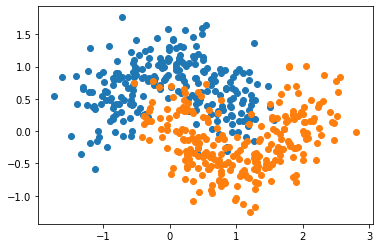

In [3]:
plt.scatter(X[y==0 , 0] , X[y==0 , 1])
plt.scatter(X[y==1 , 0] , X[y==1 , 1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y )

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [6]:
log_clf = LogisticRegression()
log_clf.fit(X_train , y_train)
log_clf.score(X_test , y_test)


0.824

In [7]:
svm_clf = SVC()
svm_clf.fit(X_train , y_train)
svm_clf.score(X_test , y_test)


0.912

In [8]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train , y_train)
dt_clf.score(X_test , y_test)

0.904

集成三个算法

In [9]:
predict1 = log_clf.predict(X_test)
predict2 = svm_clf.predict(X_test)
predict3 = dt_clf.predict(X_test)

y_predict = (predict1 + predict2 + predict3)
y_predict

array([0, 3, 3, 3, 1, 2, 0, 2, 0, 3, 3, 1, 3, 0, 3, 0, 3, 3, 0, 3, 0, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 1, 1, 0, 0, 2,
       3, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3,
       3, 3, 0, 2, 1, 0, 0, 3, 0, 3, 3, 3, 3, 0, 1, 3, 0, 0, 3, 2, 0, 1,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 1, 3, 3, 0,
       3, 0, 0, 0, 0, 1, 3, 3, 1, 3, 1, 0, 0, 0, 3], dtype=int64)

y_predict 中值小于2的就是其中至少两个算法都认为其是分类为0的

In [10]:
y_predict = np.array(y_predict>=2 , dtype='int')
y_predict

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [11]:
y_test

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_predict)

0.888

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## 使用sklearn实现

In [13]:
from sklearn.ensemble import VotingClassifier

In [14]:


vot_clf = VotingClassifier([
    ("log_clf" , LogisticRegression()),
    ("svm_clf" , SVC()),
    ("dt_clf" , DecisionTreeClassifier(random_state=666))
] , voting='hard')

In [15]:
vot_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('log_clf',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm_clf',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, co...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                          

In [16]:
vot_clf.score(X_test , y_test)

0.888

### soft voting classifier

分配权重

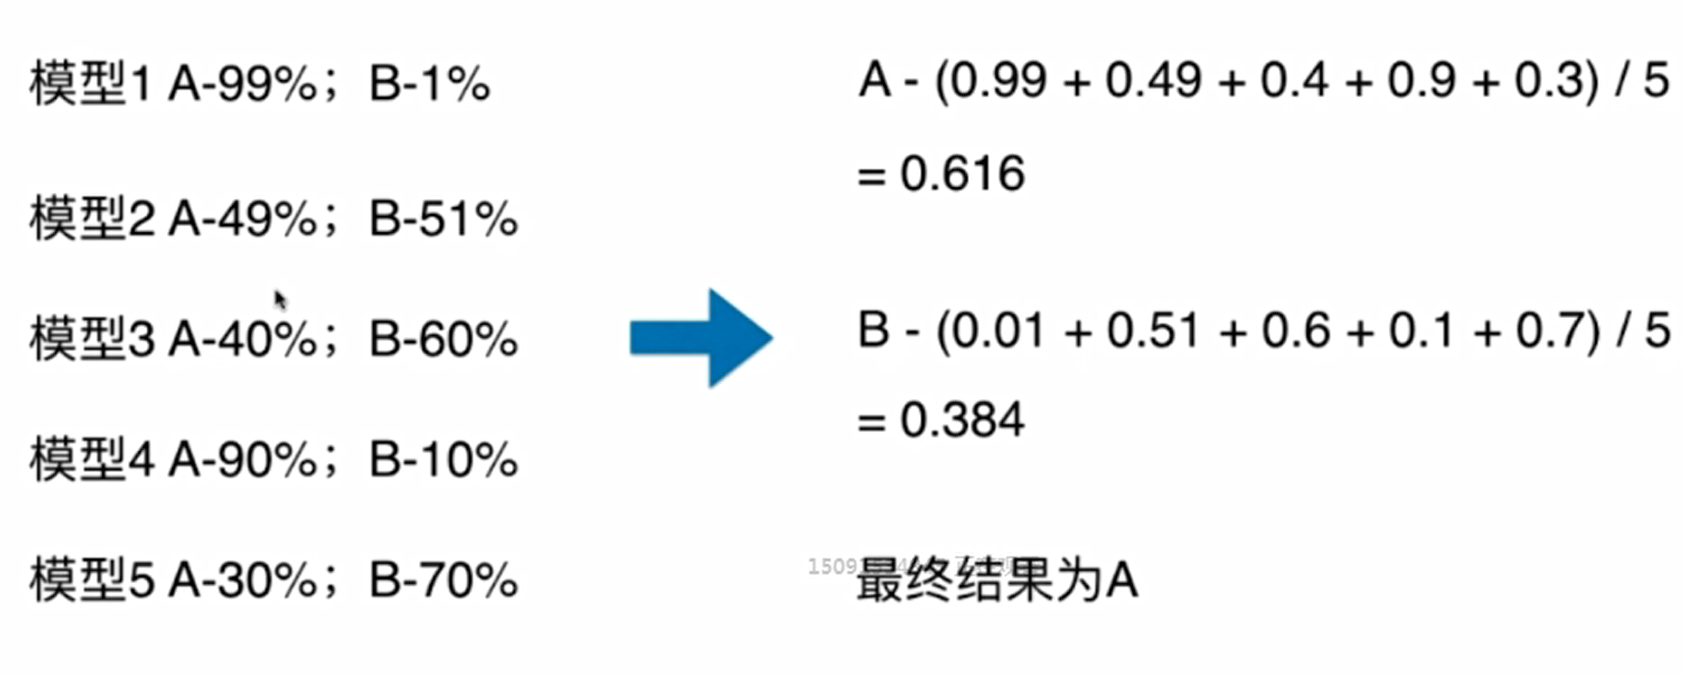

In [17]:
vot_clf2 = VotingClassifier([
    ("log_clf" , LogisticRegression()),
    ("svm_clf" , SVC( probability=True)),
    ("dt_clf" , DecisionTreeClassifier(random_state=666))
] , voting='soft')

In [18]:
vot_clf2.fit(X_train , y_train)

VotingClassifier(estimators=[('log_clf',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svm_clf',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, co...
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                          

In [19]:
vot_clf2.score(X_test , y_test)

0.928

## 增加子模型

每个子模型只看样本的一部分，保证每个子模型的差异性

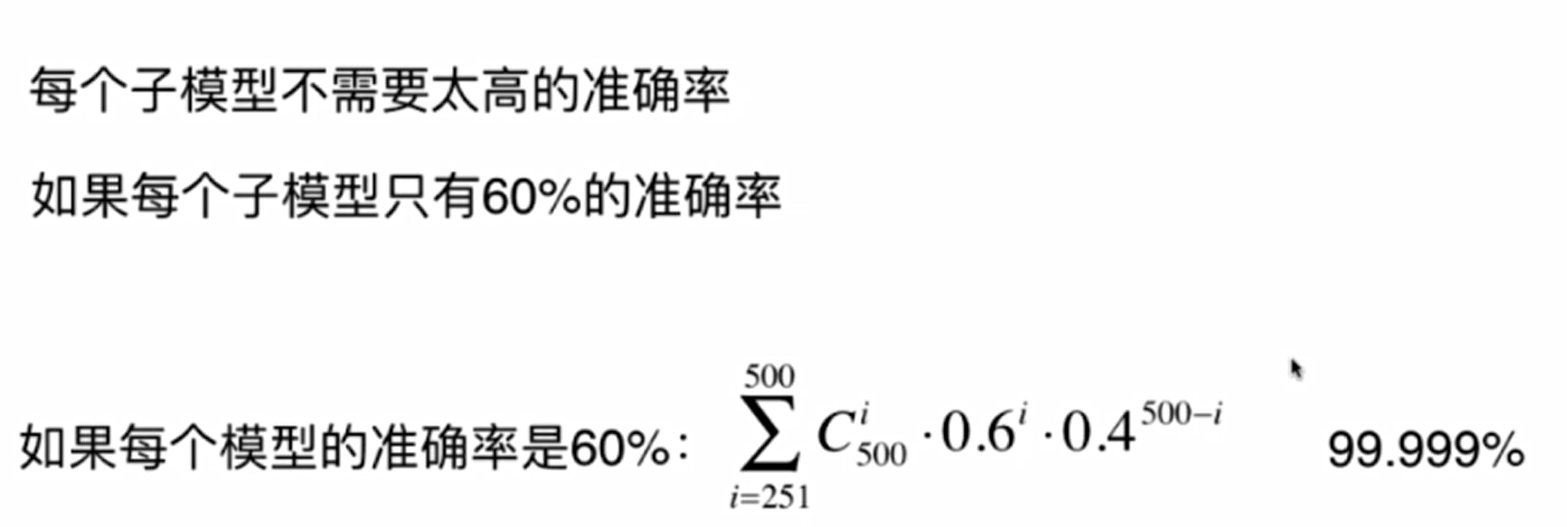

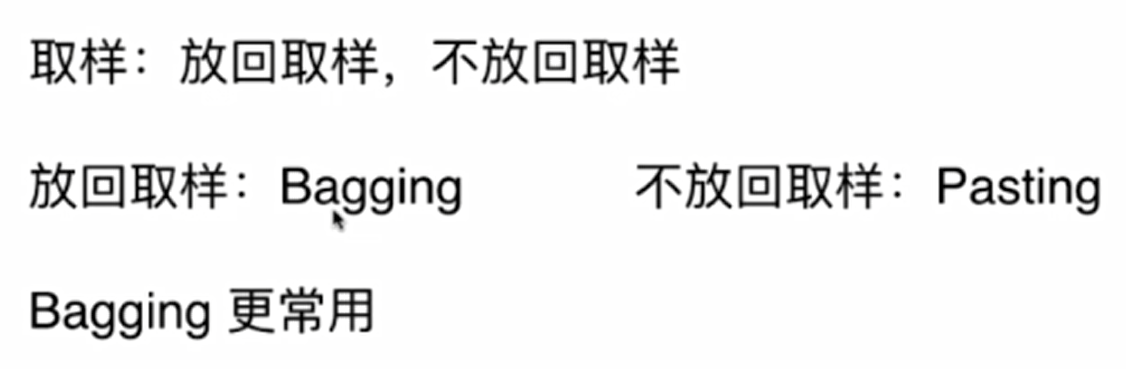

In [33]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier( DecisionTreeClassifier(),
                           n_estimators=500 , max_samples=100 , bootstrap=True)   #使用决策树分类器 ， 500个子模型 ， 每个子模型100个样本 ， 放回取样

In [34]:
bag_clf.fit(X_train , y_train)
bag_clf.score(X_test , y_test)

0.944

## oob和更多Bagging相关

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42) 

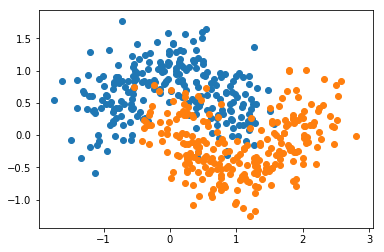

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### oob

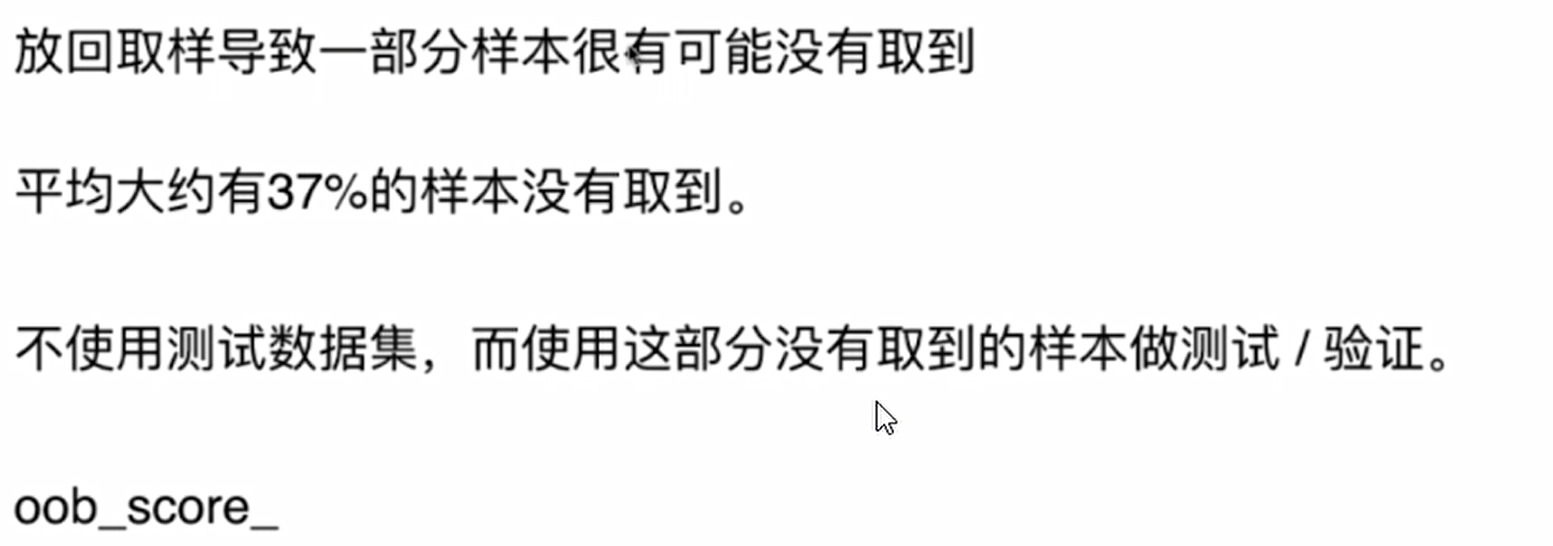

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [5]:
bagging_clf.oob_score_

0.91800000000000004

### n_jobs

In [6]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)

CPU times: user 1.81 s, sys: 27.2 ms, total: 1.84 s
Wall time: 2.95 s


In [7]:
%%time
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True,
                               n_jobs=-1)
bagging_clf.fit(X, y)

CPU times: user 385 ms, sys: 56.1 ms, total: 441 ms
Wall time: 1.83 s


### bootstrap_features

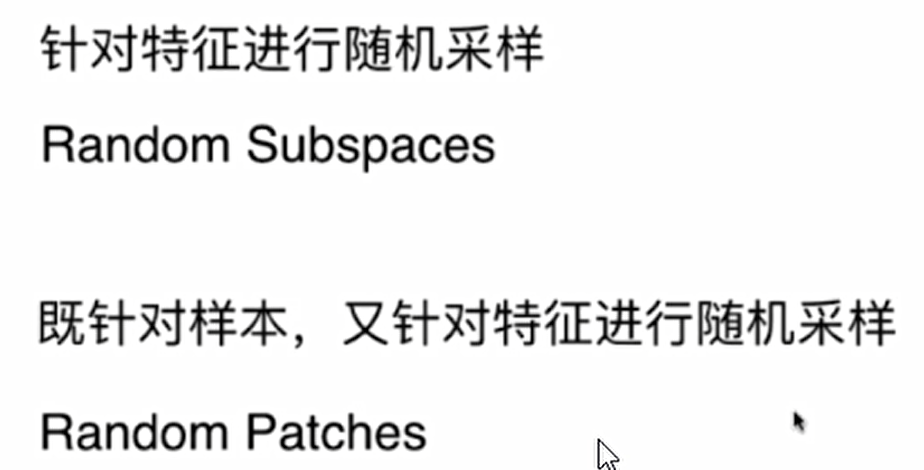

In [8]:
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=500,
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)
random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

0.83399999999999996

In [9]:
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True, oob_score=True,
                               max_features=1, bootstrap_features=True)
random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

0.85799999999999998

## 随机森林

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier( n_estimators=500 , random_state=666 , n_jobs=-1 , oob_score=True , bootstrap=True )

In [39]:
rf_clf.fit(X , y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=666, verbose=0,
                       warm_start=False)

In [40]:
rf_clf.oob_score_

0.896

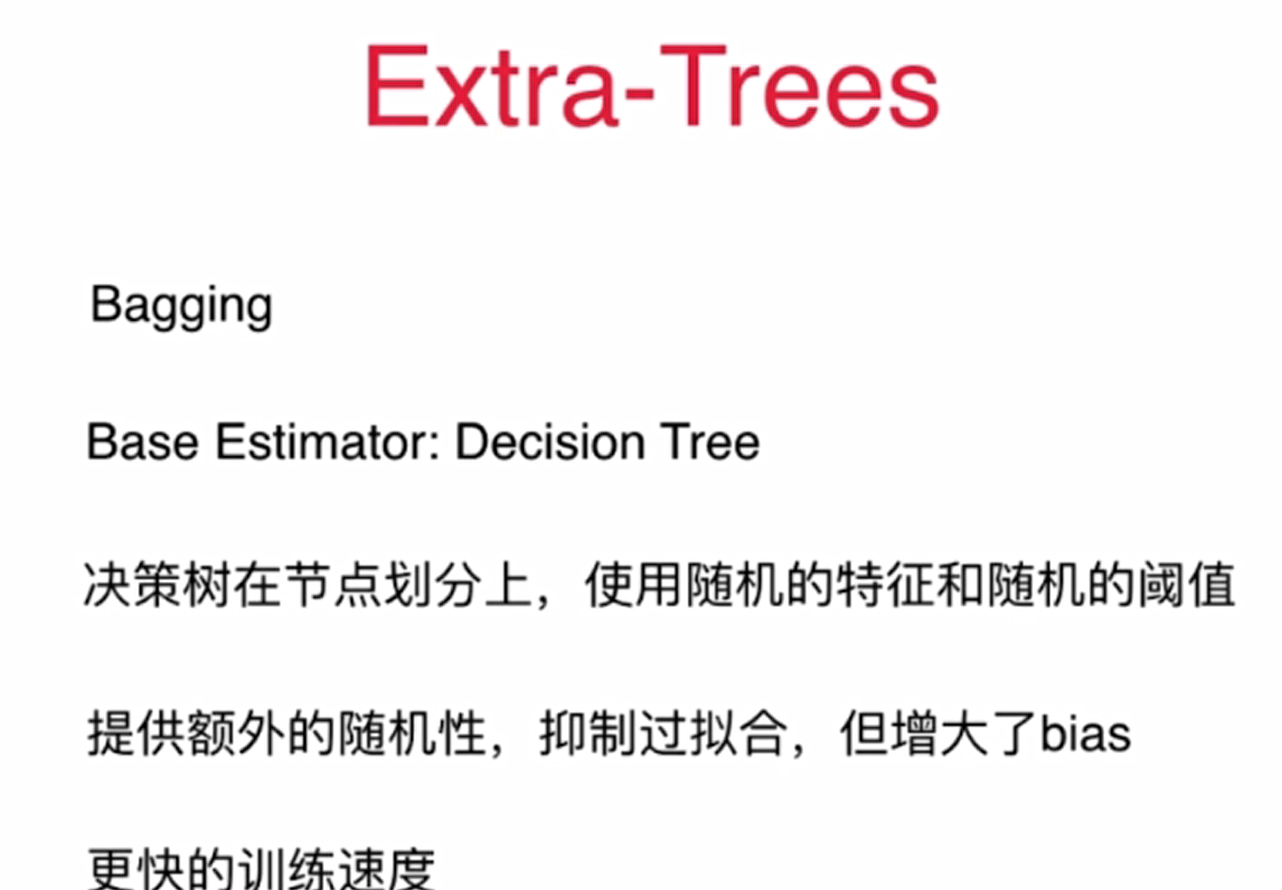

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(bootstrap=True , random_state=666 , n_jobs=-1 , n_estimators=500 , oob_score=True)

In [42]:
et_clf.fit(X , y)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                     oob_score=True, random_state=666, verbose=0,
                     warm_start=False)

In [43]:
et_clf.oob_score_

0.892

## Boosting

AdaBoosting

GradientBoosting

### AdaBoosting

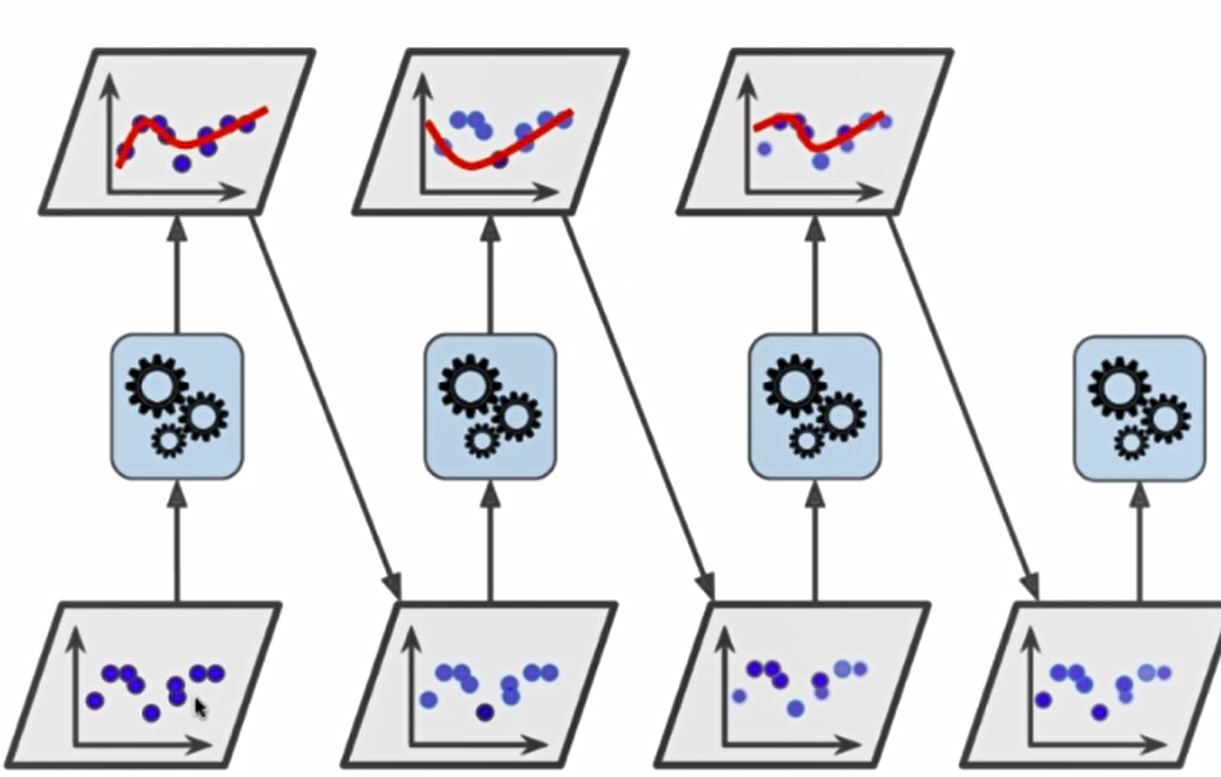

每次训练后重新对偏差较大的数据赋予更高的权重，再训练

In [44]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier( DecisionTreeClassifier(max_depth=2) , n_estimators=500) 

In [45]:
ada_clf.fit(X_train , y_train)  #Boosting 没有oob

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [46]:
ada_clf.score(X_test , y_test)

0.92

### GradientBoosting 

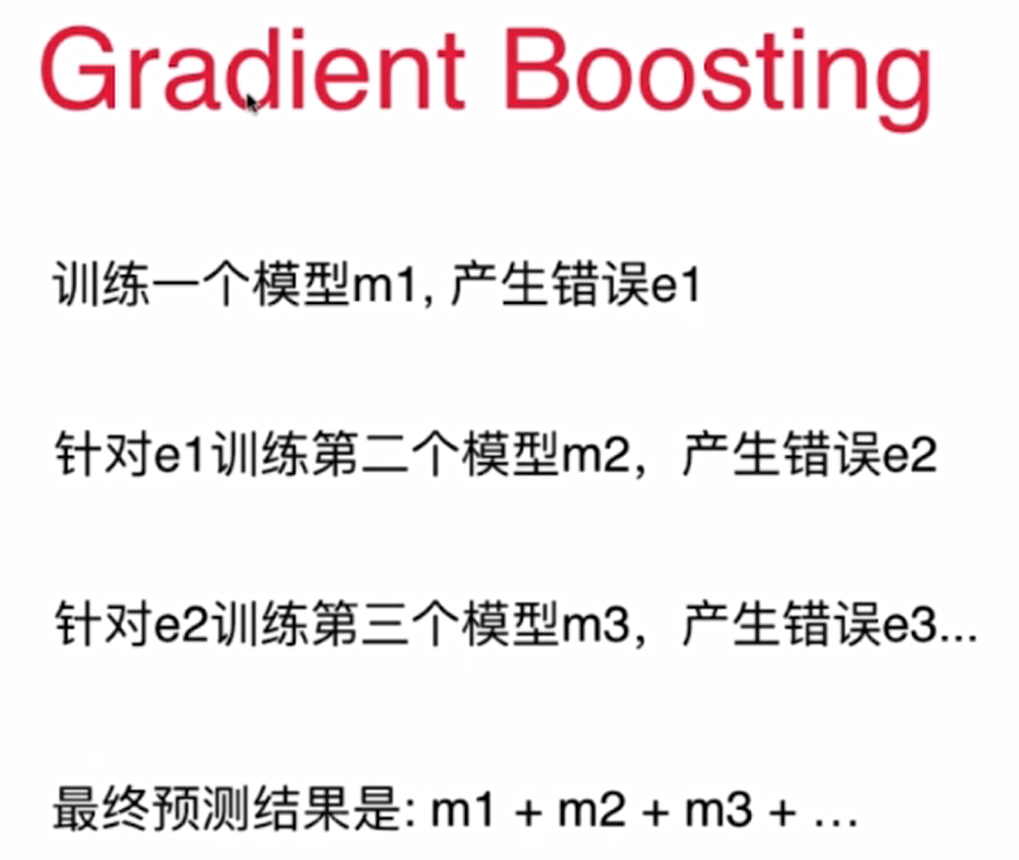

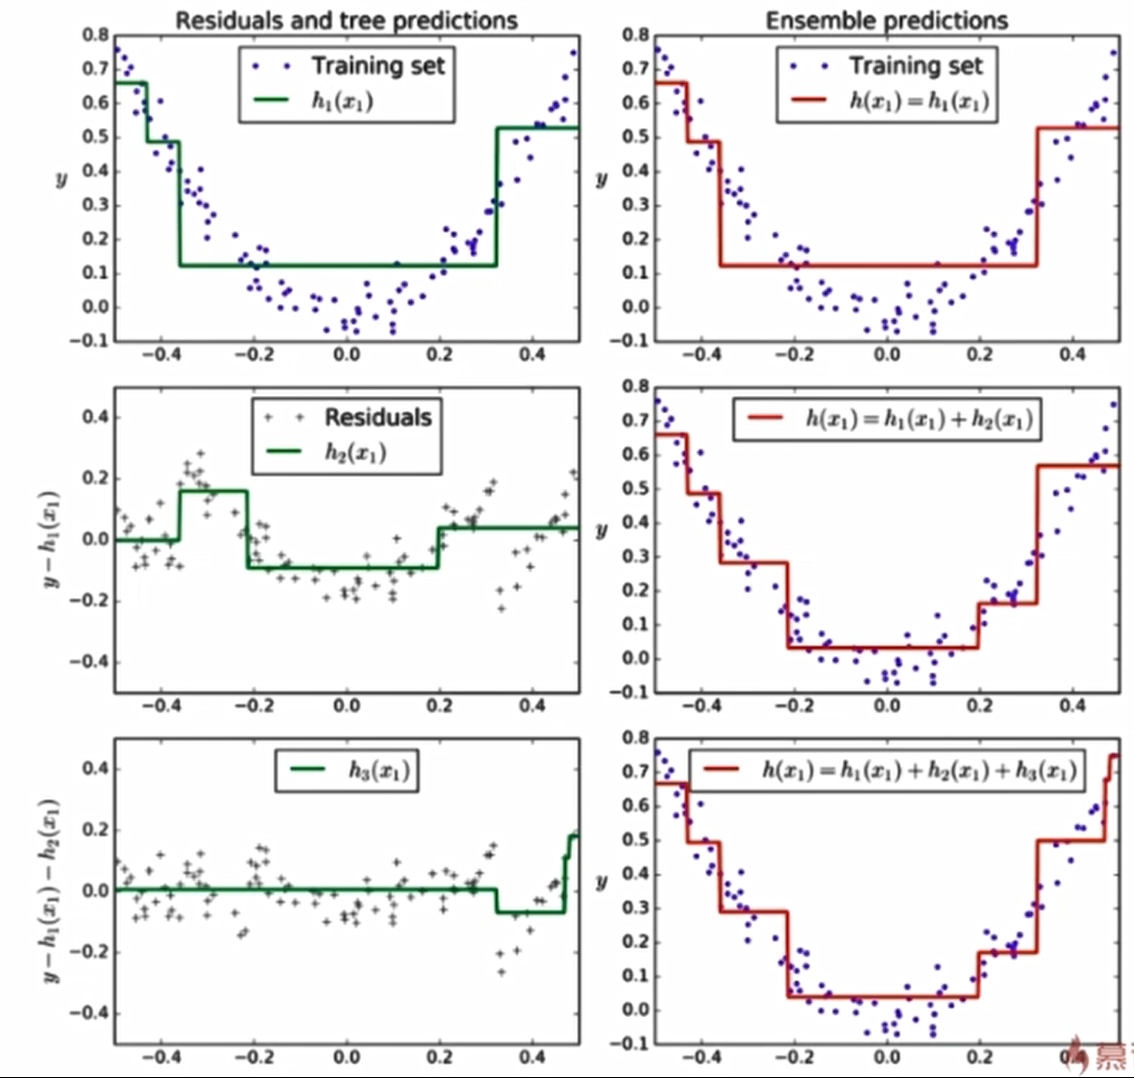

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
gd_clf = GradientBoostingClassifier(n_estimators=500 , random_state=666 , max_depth=2)  #默认使用决策树

In [49]:
gd_clf.fit(X_train , y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=666, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [50]:
gd_clf.score(X_test , y_test)

0.928

### Stacking

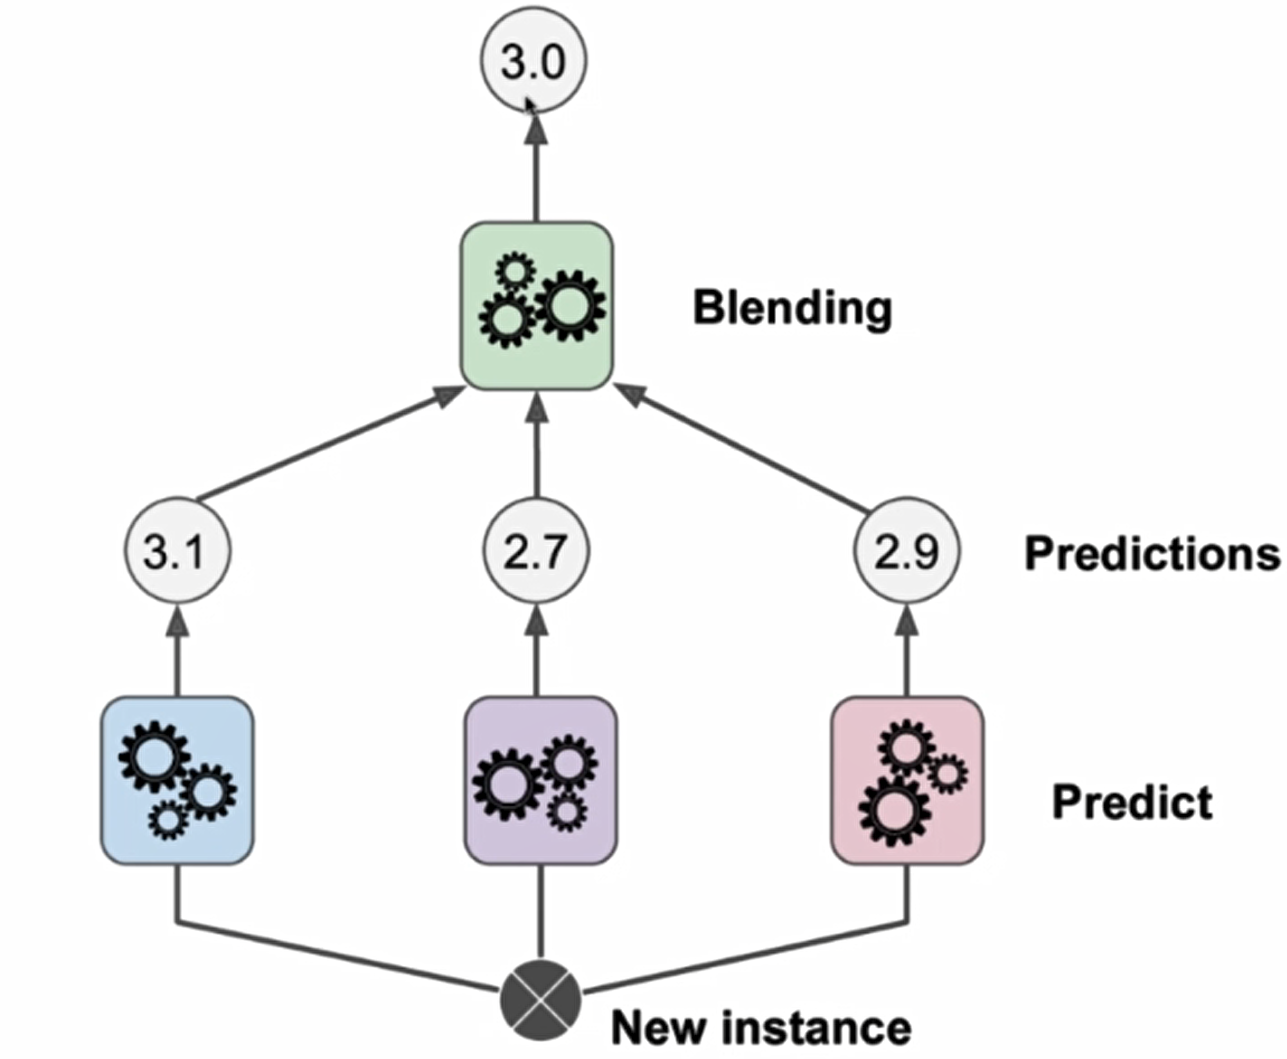

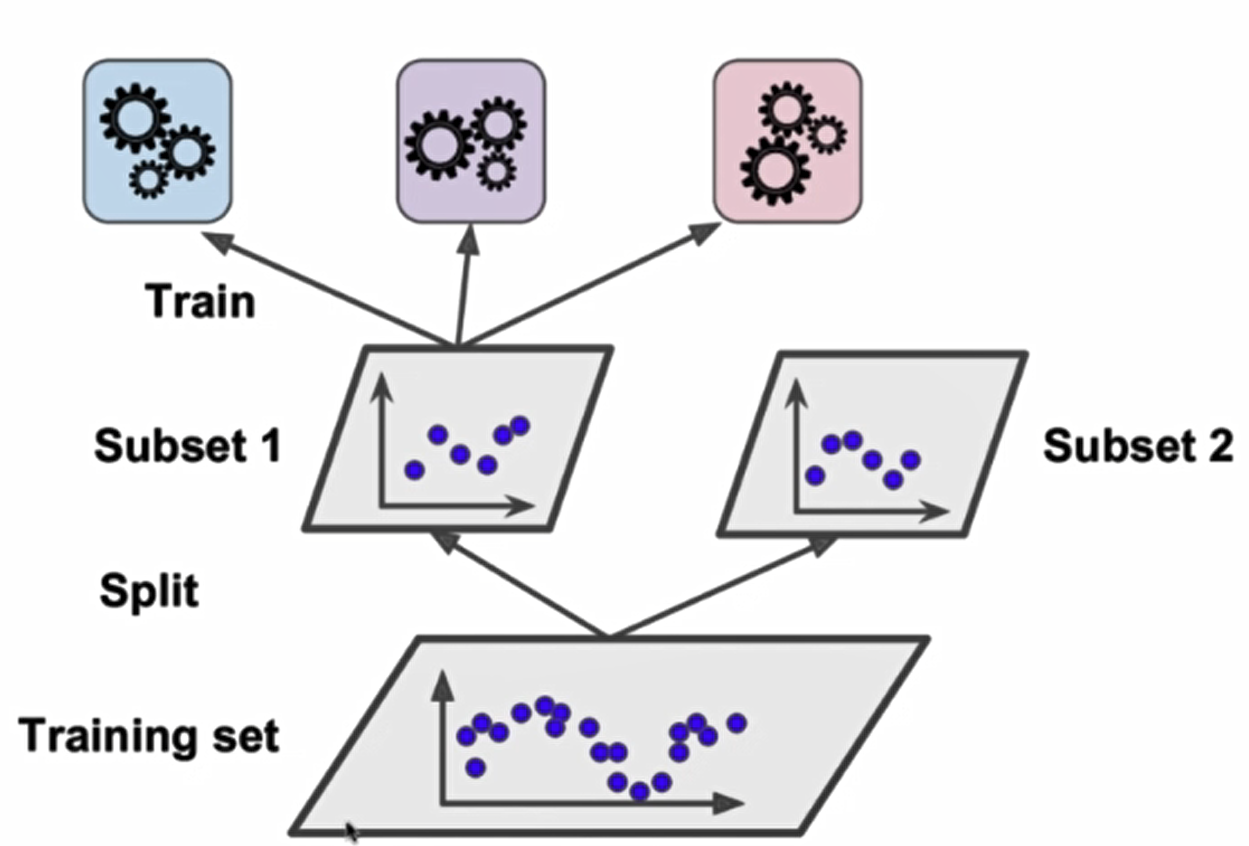

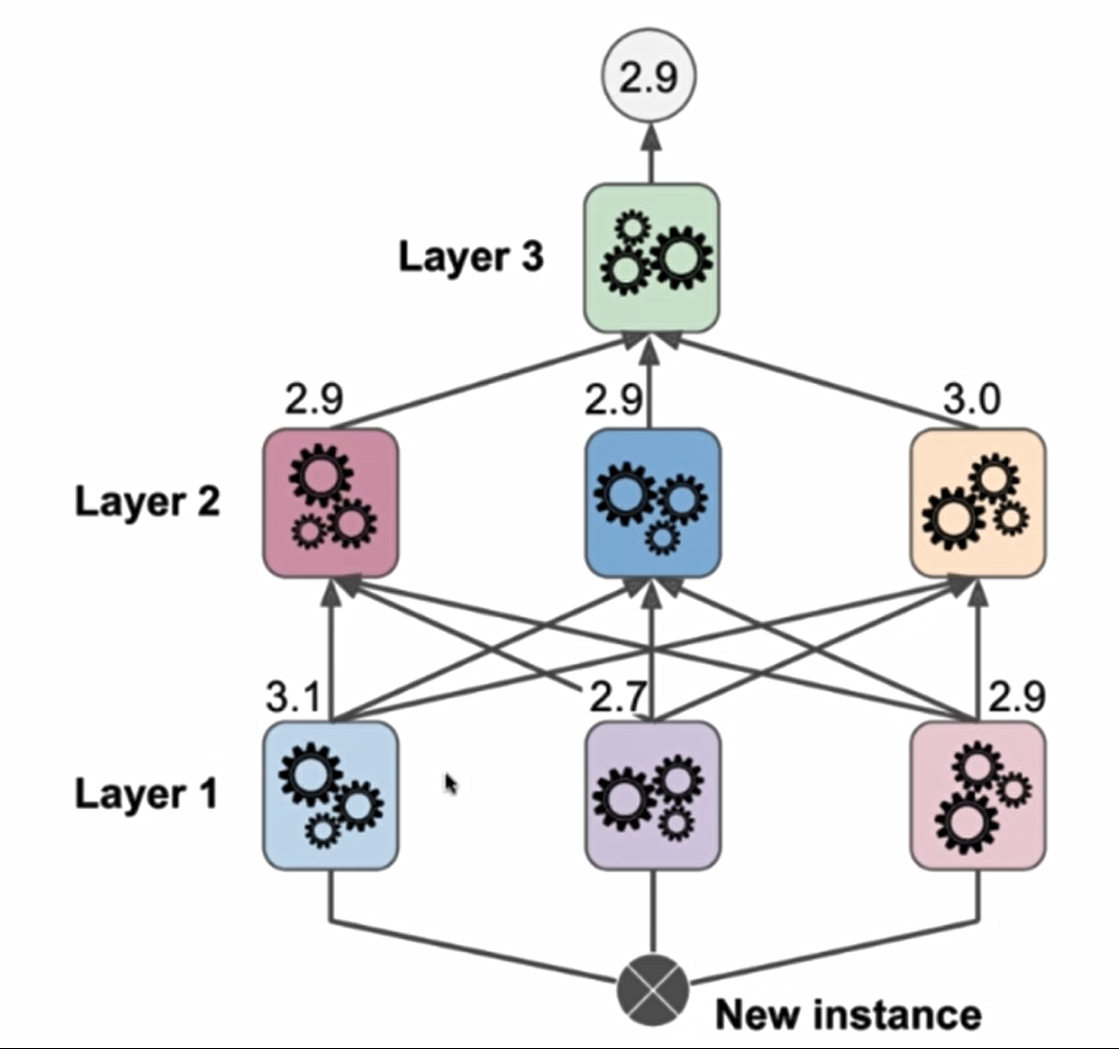

将数据分为x部分，对应训练不同层的模型 

In [52]:
from sklearn.ensemble import StackingClassifier

In [56]:
estimator = [
    ("log_clf" , LogisticRegression()),
    ("dt_clf " , DecisionTreeClassifier()),
    ("svm_clf" , SVC())
]

In [57]:
sta_clf = StackingClassifier(estimators=estimator )

In [58]:
sta_clf.fit(X_train , y_train)

StackingClassifier(cv=None,
                   estimators=[('log_clf',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=100,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=None,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                               ('dt_clf ',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                      

In [59]:
sta_clf.score(X_test , y_test)

0.904

## 以上算法均可解决回归问题